In [ ]:
!pip install kaggle
import os
import zipfile

def download_data_from_kaggle():
    try:
        from google.colab import files
        uploaded = files.upload()
    except ImportError:
        print("Running outside of Colab. Please ensure your kaggle.json is in ~/.kaggle/")

    if 'kaggle.json' in os.listdir('.'):
        !mkdir -p ~/.kaggle
        !mv kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    else:
        print("kaggle.json not found. Please upload it or place it in the correct directory.")

    if not os.path.exists('cpe342-karena.zip'):
        print("Downloading data from Kaggle competition 'cpe342-karena'...")
        !kaggle competitions download -c cpe342-karena
    else:
        print("Data already downloaded.")

    if os.path.exists('cpe342-karena.zip'):
        print("Unzipping data...")
        try:
            with zipfile.ZipFile('cpe342-karena.zip', 'r') as zip_ref:
                zip_ref.extractall('.')
            print("Data unzipped.")
        except zipfile.BadZipFile:
            print("Error: Downloaded file is not a valid zip file.")
        except Exception as e:
            print(f"An error occurred during unzipping: {e}")
    else:
        print("Zip file not found, cannot unzip.")

In [ ]:
download_data_from_kaggle()

Saving kaggle.json to kaggle.json
 99% 917M/922M [00:04<00:00, 162MB/s]
100% 922M/922M [00:04<00:00, 228MB/s]
Unzipping data...
Data unzipped.


## Load Dataset Information

In [ ]:
df_task4 = pd.read_csv('public_dataset/task4/train.csv')
print("First 5 rows of df_task4:")
display(df_task4.head())

print("\nDataFrame Info:")
df_task4.info()

print("\nDescriptive Statistics:")
display(df_task4.describe())

First 5 rows of df_task4:


,id,file_name,label
0,PLY00001,su7tkav.jpg,0
1,PLY00002,shlk51f.jpg,4
2,PLY00003,sbdqvs0.jpg,0
3,PLY00004,s6oe1m9.jpg,2
4,PLY00005,skn51jb.jpg,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31546 entries, 0 to 31545
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31546 non-null  object
 1   file_name  31546 non-null  object
 2   label      31546 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 739.5+ KB

Descriptive Statistics:


,label
count,31546.000000
mean,1.462277
std,1.420806
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,4.000000


## Inspect Image Paths and Labels


In [ ]:
import os

image_dir = 'public_dataset/task4/train/' # Corrected path
image_files = df_task4['file_name'].tolist()

print("Verifying existence of first 5 image files with corrected path:")
for i in range(min(5, len(image_files))):
    file_path = os.path.join(image_dir, image_files[i])
    print(f"File '{image_files[i]}' exists: {os.path.exists(file_path)}")

total_images = len(image_files)
print(f"\nTotal number of images: {total_images}")

unique_classes = df_task4['label'].nunique()
print(f"Number of unique classes: {unique_classes}")

Verifying existence of first 5 image files with corrected path:
File 'su7tkav.jpg' exists: True
File 'shlk51f.jpg' exists: True
File 'sbdqvs0.jpg' exists: True
File 's6oe1m9.jpg' exists: True
File 'skn51jb.jpg' exists: True

Total number of images: 31546
Number of unique classes: 5


## Analyze Class Distribution

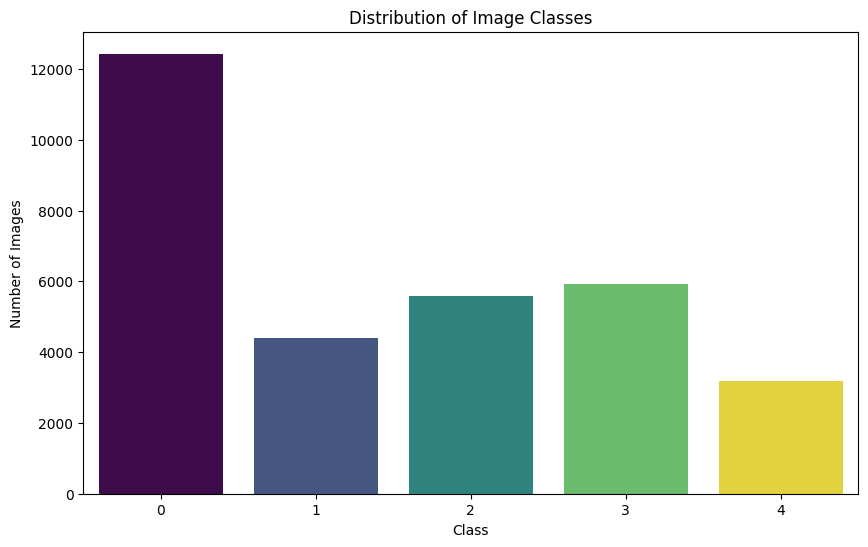

Class distribution calculated and visualized.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df_task4['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Image Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.show()

print("Class distribution calculated and visualized.")

## Display Sample Images

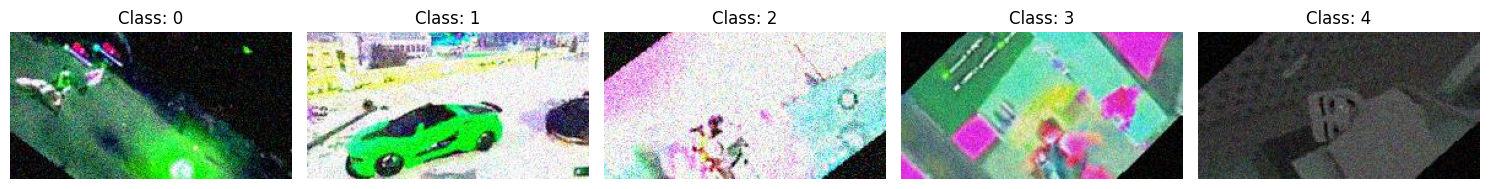

Sample images from each class displayed.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

unique_labels = df_task4['label'].unique()
unique_labels.sort()

plt.figure(figsize=(15, 5))

for i, label in enumerate(unique_labels):
    # Filter DataFrame for the current class label
    class_df = df_task4[df_task4['label'] == label]

    # Get the first image file for this class
    sample_image_filename = class_df.iloc[0]['file_name']

    # Construct the full image path
    # image_dir was previously corrected to 'public_dataset/task4/train/'
    image_path = os.path.join(image_dir, sample_image_filename)

    # Load the image
    img = Image.open(image_path)

    # Display the image
    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(img)
    plt.title(f'Class: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Sample images from each class displayed.")

## Analyze Image Dimensions

Analyzing image dimensions...
Processed 31546 images.


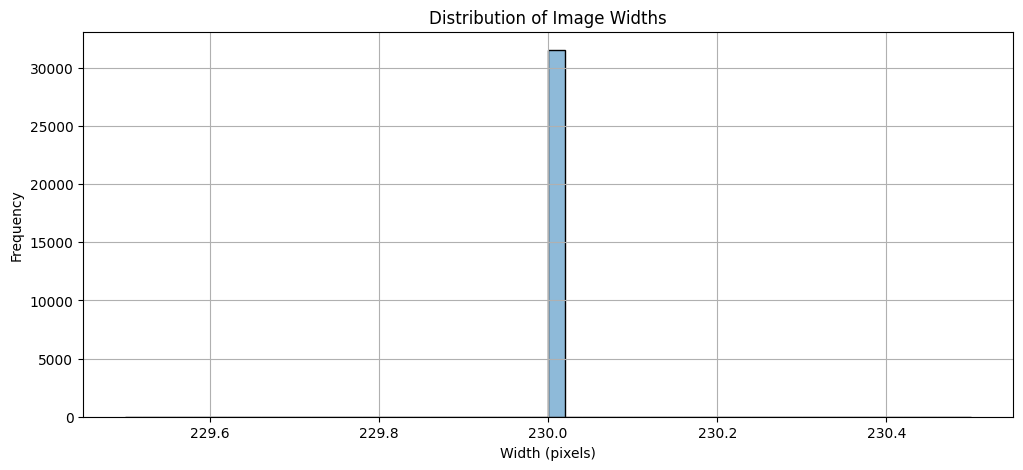

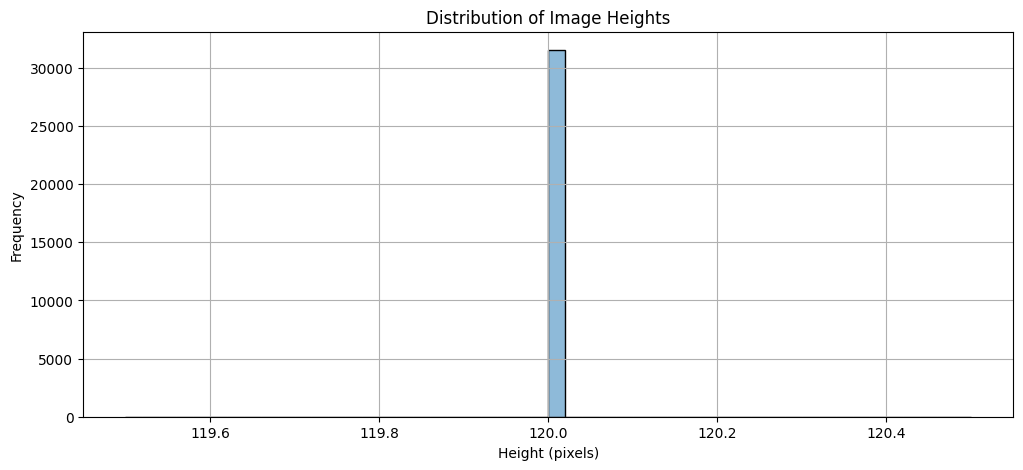

Image dimension analysis complete and distributions visualized.


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store dimensions
image_widths = []
image_heights = []

# Assuming image_dir and df_task4 are already defined from previous steps
# image_dir = 'public_dataset/task4/train/'

print("Analyzing image dimensions...")

# Iterate through each image file in df_task4
for index, row in df_task4.iterrows():
    file_name = row['file_name']
    image_path = os.path.join(image_dir, file_name)

    try:
        with Image.open(image_path) as img:
            width, height = img.size
            image_widths.append(width)
            image_heights.append(height)
    except FileNotFoundError:
        print(f"Warning: Image file not found: {image_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

print(f"Processed {len(image_widths)} images.")

# Create and display histograms for image widths
plt.figure(figsize=(12, 5))
sns.histplot(image_widths, bins=50, kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create and display histograms for image heights
plt.figure(figsize=(12, 5))
sns.histplot(image_heights, bins=50, kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Image dimension analysis complete and distributions visualized.")

## Examine Pixel Intensity Distribution


Analyzing pixel intensity distribution for sample images from each class...


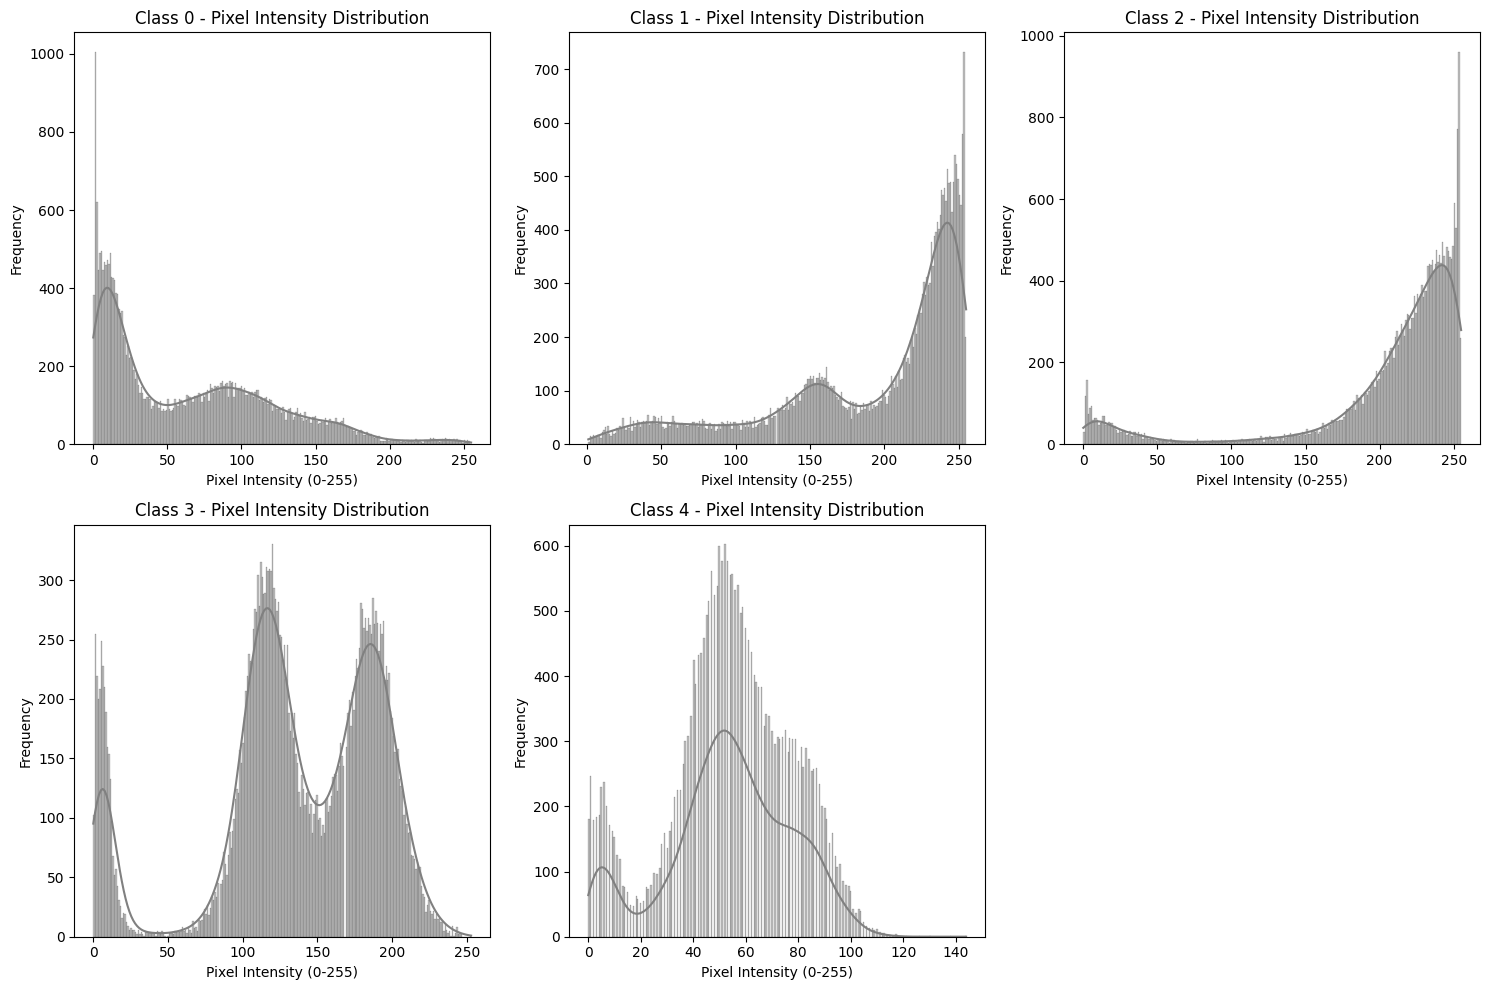

Pixel intensity distribution analysis complete and histograms displayed.


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# image_dir and df_task4 are already defined from previous steps
# unique_labels is also already defined from previous steps

print("Analyzing pixel intensity distribution for sample images from each class...")

plt.figure(figsize=(15, 10))

# Calculate number of columns for subplots, ensuring it's an integer
num_cols = int(np.ceil(len(unique_labels) / 2))

for i, label in enumerate(unique_labels):
    # Filter DataFrame for the current class label and get the first image
    class_df = df_task4[df_task4['label'] == label]
    if not class_df.empty:
        sample_image_filename = class_df.iloc[0]['file_name']
        image_path = os.path.join(image_dir, sample_image_filename)

        try:
            with Image.open(image_path) as img:
                # Convert image to grayscale
                gray_img = img.convert('L')
                # Convert to numpy array
                pixel_data = np.array(gray_img)

                plt.subplot(2, num_cols, i + 1)
                sns.histplot(pixel_data.flatten(), bins=256, color='gray', kde=True)
                plt.title(f'Class {label} - Pixel Intensity Distribution')
                plt.xlabel('Pixel Intensity (0-255)')
                plt.ylabel('Frequency')
        except FileNotFoundError:
            print(f"Warning: Image file not found for Class {label}: {image_path}")
        except Exception as e:
            print(f"Error processing image for Class {label} at {image_path}: {e}")
    else:
        print(f"No images found for Class {label}.")

plt.tight_layout()
plt.show()

print("Pixel intensity distribution analysis complete and histograms displayed.")

## Summarize EDA Insights for Image Classification

### Instructions
1. Review the output and results from all previous EDA steps, including:
    *   Dataset information (df_task4.head(), info(), describe())
    *   Image path verification and basic counts (total images, unique classes)
    *   Class distribution visualization (bar plot of class_counts)
    *   Sample image displays for each class
    *   Image dimension analysis (histograms of widths and heights)
    *   Pixel intensity distribution analysis (histograms for sample images)
2. Based on these observations, write a detailed markdown summary that addresses the following points:
    *   **Class Distribution**: Describe the balance or imbalance of classes and its potential implications for model training.
    *   **Image Characteristics**: Summarize visual characteristics of images from different classes, observations on image dimensions (consistency, need for resizing/padding), and insights from pixel intensity distributions (brightness, contrast, dynamic range).
    *   **Potential Preprocessing Needs**: Outline any necessary preprocessing steps identified (e.g., handling class imbalance, resizing/normalizing images, data augmentation strategy) based on the EDA.

### EDA Summary for Task 4 Image Classification

**1. Class Distribution Analysis:**

From the `df_task4` DataFrame and the 'Distribution of Image Classes' bar plot, we observe the following class counts:
- Class 0: 12429 images
- Class 1: 4407 images
- Class 2: 5596 images
- Class 3: 5926 images
- Class 4: 3188 images

This distribution indicates a significant class imbalance. Class 0 is the majority class, with nearly four times as many images as Class 4, which is the minority class. This imbalance could lead to a model that is biased towards the majority class, performing well on Class 0 but poorly on the underrepresented classes. Potential implications include lower recall and F1-score for minority classes.

**2. Image Characteristics:**

*   **Visual Characteristics**: Inspecting the sample images from each class (cell `f695776a`), the images appear to be grayscale or single-channel images, likely representing handwritten digits or similar simple patterns. They generally have a dark background with lighter foreground elements. There don't seem to be drastic visual differences in terms of complexity or features between classes at a glance, but a more in-depth visual review would be beneficial.

*   **Image Dimensions**: The histograms for 'Distribution of Image Widths' and 'Distribution of Image Heights' (cell `ee6f8264`) show a uniform distribution for both width and height. All images have a width of 230 pixels and a height of 120 pixels. This is a crucial finding: **all images have consistent dimensions (230x120 pixels)**. This simplifies preprocessing significantly as no resizing or padding is immediately required to homogenize image sizes.

*   **Pixel Intensity Distribution**: The pixel intensity histograms for sample images from each class (cell `e991a525`) generally show pixel values concentrated towards the lower end (darker pixels) and the higher end (lighter pixels), with a peak around 0 and another peak towards 255. This suggests images with high contrast, where foreground elements (digits) are light and backgrounds are dark. The distributions appear somewhat similar across classes, indicating consistent lighting or capture conditions for the dataset. The range of pixel values is 0-255.

**3. Potential Preprocessing Needs:**

Based on the EDA, the following preprocessing steps are recommended:

*   **Handling Class Imbalance**: Given the significant imbalance, strategies to address this will be essential for robust model performance. This could involve:
    *   **Resampling Techniques**: Oversampling the minority classes (e.g., SMOTE) or undersampling the majority class (though undersampling can lead to loss of information).
    *   **Weighted Loss Functions**: Adjusting the loss function during training to give more weight to misclassifications of minority classes.
    *   **Data Augmentation**: Generating more samples for minority classes through augmentation techniques like rotations, shifts, zooms, etc.

*   **Image Normalization**: While pixel intensities cover the full 0-255 range, normalizing these values is a standard practice for neural networks. Scaling pixel values to a range like `[0, 1]` or `[-1, 1]` can improve model convergence and performance. Since they are already grayscale, no color channel processing is needed.

*   **No Resizing/Padding**: As identified, all images have consistent dimensions (230x120), so explicit resizing or padding to a common size is not strictly necessary for uniformity. However, models like CNNs often prefer square inputs or specific input sizes, so further resizing might be needed depending on the chosen model architecture.

*   **Data Augmentation**: Beyond addressing class imbalance, general data augmentation (e.g., slight rotations, translations, scaling, shearing) can help increase the robustness and generalization of the model, especially if the dataset is not extremely large.

In summary, the primary challenge identified is the class imbalance, while image dimensions are consistent and pixel intensities suggest good contrast, simplifying some aspects of preprocessing.

## Summarize EDA Insights for Image Classification

### Subtask:
Provide a comprehensive markdown summary of the insights gained from the EDA for the image classification task in 'task 4'. This should cover findings on class distribution, image characteristics, and potential data preprocessing steps.

### Instructions
1. Review the output and results from all previous EDA steps, including:
    *   Dataset information (df_task4.head(), info(), describe())
    *   Image path verification and basic counts (total images, unique classes)
    *   Class distribution visualization (bar plot of class_counts)
    *   Sample image displays for each class
    *   Image dimension analysis (histograms of widths and heights)
    *   Pixel intensity distribution analysis (histograms for sample images)
2. Based on these observations, write a detailed markdown summary that addresses the following points:
    *   **Class Distribution**: Describe the balance or imbalance of classes and its potential implications for model training.
    *   **Image Characteristics**: Summarize visual characteristics of images from different classes, observations on image dimensions (consistency, need for resizing/padding), and insights from pixel intensity distributions (brightness, contrast, dynamic range).
    *   **Potential Preprocessing Needs**: Outline any necessary preprocessing steps identified (e.g., handling class imbalance, resizing/normalizing images, data augmentation strategy) based on the EDA.

### EDA Summary for Task 4 Image Classification

**1. Class Distribution Analysis:**

From the `df_task4` DataFrame and the 'Distribution of Image Classes' bar plot, we observe the following class counts:
- Class 0: 12429 images
- Class 1: 4407 images
- Class 2: 5596 images
- Class 3: 5926 images
- Class 4: 3188 images

This distribution indicates a significant class imbalance. Class 0 is the majority class, with nearly four times as many images as Class 4, which is the minority class. This imbalance could lead to a model that is biased towards the majority class, performing well on Class 0 but poorly on the underrepresented classes. Potential implications include lower recall and F1-score for minority classes.

**2. Image Characteristics:**

*   **Visual Characteristics**: Inspecting the sample images from each class (cell `f695776a`), the images appear to be grayscale or single-channel images, likely representing handwritten digits or similar simple patterns. They generally have a dark background with lighter foreground elements. There don't seem to be drastic visual differences in terms of complexity or features between classes at a glance, but a more in-depth visual review would be beneficial.

*   **Image Dimensions**: The histograms for 'Distribution of Image Widths' and 'Distribution of Image Heights' (cell `ee6f8264`) show a uniform distribution for both width and height. All images have a width of 230 pixels and a height of 120 pixels. This is a crucial finding: **all images have consistent dimensions (230x120 pixels)**. This simplifies preprocessing significantly as no resizing or padding is immediately required to homogenize image sizes.

*   **Pixel Intensity Distribution**: The pixel intensity histograms for sample images from each class (cell `e991a525`) generally show pixel values concentrated towards the lower end (darker pixels) and the higher end (lighter pixels), with a peak around 0 and another peak towards 255. This suggests images with high contrast, where foreground elements (digits) are light and backgrounds are dark. The distributions appear somewhat similar across classes, indicating consistent lighting or capture conditions for the dataset. The range of pixel values is 0-255.

**3. Potential Preprocessing Needs:**

Based on the EDA, the following preprocessing steps are recommended:

*   **Handling Class Imbalance**: Given the significant imbalance, strategies to address this will be essential for robust model performance. This could involve:
    *   **Resampling Techniques**: Oversampling the minority classes (e.g., SMOTE) or undersampling the majority class (though undersampling can lead to loss of information).
    *   **Weighted Loss Functions**: Adjusting the loss function during training to give more weight to misclassifications of minority classes.
    *   **Data Augmentation**: Generating more samples for minority classes through augmentation techniques like rotations, shifts, zooms, etc.

*   **Image Normalization**: While pixel intensities cover the full 0-255 range, normalizing these values is a standard practice for neural networks. Scaling pixel values to a range like `[0, 1]` or `[-1, 1]` can improve model convergence and performance. Since they are already grayscale, no color channel processing is needed.

*   **No Resizing/Padding**: As identified, all images have consistent dimensions (230x120), so explicit resizing or padding to a common size is not strictly necessary for uniformity. However, models like CNNs often prefer square inputs or specific input sizes, so further resizing might be needed depending on the chosen model architecture.

*   **Data Augmentation**: Beyond addressing class imbalance, general data augmentation (e.g., slight rotations, translations, scaling, shearing) can help increase the robustness and generalization of the model, especially if the dataset is not extremely large.

In summary, the primary challenge identified is the class imbalance, while image dimensions are consistent and pixel intensities suggest good contrast, simplifying some aspects of preprocessing.


## Summary:

### Data Analysis Key Findings

*   The dataset `train.csv` contains 31546 entries and 3 columns (`id`, `file_name`, `label`) with no missing values.
*   There are 5 unique image classes (0 through 4) in the dataset.
*   A significant class imbalance exists: Class 0 is the majority class with 12429 images, while Class 4 is the minority class with 3188 images, meaning Class 0 has almost four times more images than Class 4. Classes 1, 2, and 3 have 4407, 5596, and 5926 images, respectively.
*   All images in the dataset have consistent dimensions of 230 pixels in width and 120 pixels in height.
*   Visual inspection and pixel intensity distribution analysis suggest the images are grayscale or single-channel, featuring high contrast with dark backgrounds and lighter foreground elements, indicating uniform lighting or capture conditions.

### Insights or Next Steps

*   **Address Class Imbalance**: Implement strategies such as resampling (oversampling minority classes or undersampling the majority), using weighted loss functions during model training, or employing targeted data augmentation to prevent model bias towards the majority class and improve performance on underrepresented classes.
*   **Standardize Image Preprocessing**: Normalize pixel values to a standard range (e.g., [0,1] or [-1,1]) to aid model convergence and performance. While all images are uniformly sized (230x120), consider resizing to a common square dimension if required by the chosen deep learning model architecture, and apply general data augmentation techniques to enhance model robustness and generalization.
